In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# O-Ring Dataset

In [2]:
df = pd.read_excel('Temperature1.xlsx')
df

,Flight Number,Launch Temperature,Damage to O-ring
0,STS 1,66,0
1,STS 2,70,1
2,STS 3,69,0
3,STS 4,80,0
4,STS 5,68,0
5,STS 6,67,0
6,STS 7,72,0
7,STS 8,73,0
8,STS 9,70,0
9,STS 41B,57,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Flight Number       24 non-null     object
 1   Launch Temperature  24 non-null     int64 
 2   Damage to O-ring    24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [4]:
df['Damage to O-ring'].value_counts()

0    17
1     7
Name: Damage to O-ring, dtype: int64

In [5]:
from sklearn.utils import shuffle

In [6]:
X = df['Launch Temperature']
Y = df['Damage to O-ring']

X = np.array(X).reshape(-1,1)

In [7]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [8]:
pred_y = model.predict(X)
pred_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [9]:
model.predict_proba(X)

array([[0.57102623, 0.42897377],
       [0.77197036, 0.22802964],
       [0.72831943, 0.27168057],
       [0.97216005, 0.02783995],
       [0.67977869, 0.32022131],
       [0.62700679, 0.37299321],
       [0.84372193, 0.15627807],
       [0.87208756, 0.12791244],
       [0.77197036, 0.22802964],
       [0.14013361, 0.85986639],
       [0.39794525, 0.60205475],
       [0.77197036, 0.22802964],
       [0.95632545, 0.04367455],
       [0.62700679, 0.37299321],
       [0.06022167, 0.93977833],
       [0.62700679, 0.37299321],
       [0.9157735 , 0.0842265 ],
       [0.77197036, 0.22802964],
       [0.97782589, 0.02217411],
       [0.93211349, 0.06788651],
       [0.96509817, 0.03490183],
       [0.9157735 , 0.0842265 ],
       [0.93211349, 0.06788651],
       [0.17067898, 0.82932102]])

### performance matrix

In [10]:
print(confusion_matrix(Y,pred_y))

[[17  0]
 [ 3  4]]


In [11]:
print(classification_report(Y,pred_y))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       1.00      0.57      0.73         7

    accuracy                           0.88        24
   macro avg       0.93      0.79      0.82        24
weighted avg       0.89      0.88      0.86        24



In [12]:
metrics.accuracy_score(Y, pred_y)


0.875

In [13]:
metrics.precision_score(Y,pred_y)

1.0

In [14]:
auc = metrics.roc_auc_score(Y,model.predict_proba(X)[:,1])
auc

0.7941176470588235

### drawing the roc curve

In [15]:
fpr , tpr , thresholds = metrics.roc_curve(Y,model.decision_function(X))

In [16]:
roc_auc = metrics.auc(fpr,tpr)

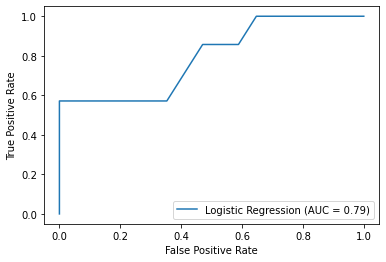

In [17]:
display = metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

# Bank Dataset

In [18]:
B = pd.read_csv('bank.csv')
B

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no


In [19]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [20]:
B['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [21]:
from sklearn.utils import resample

In [22]:
bsn = B[B['subscribed']=='no']
bsy = B[B['subscribed'] =='yes']

In [23]:
BMU = resample(bsy, replace=True, n_samples=2000, random_state=42)   # bank minority unsampled

In [24]:
NB = pd.concat([bsn, BMU])         # new bank
NB['subscribed'].value_counts()


no     4000
yes    2000
Name: subscribed, dtype: int64

In [25]:
# NB = shuffle(NB)

In [26]:
Xf = list(NB.columns)
Xf.remove('subscribed')
Xf

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [27]:
EB = pd.get_dummies(NB[Xf], drop_first=True)
X = EB
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,35,7050,3,4,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1177,28,4579,2,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3498,58,462,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4366,59,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [28]:
Y = NB['subscribed'].map(lambda x: int(x=='yes'))

In [29]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',C=5,solver='liblinear',max_iter=1000)
model.fit(Xtrain, Ytrain)

LogisticRegression(C=5, max_iter=1000, solver='liblinear')

In [31]:
predY = model.predict(Xtest)
predY

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
model.predict_proba(Xtest)

array([[0.52082311, 0.47917689],
       [0.79438209, 0.20561791],
       [0.66971103, 0.33028897],
       ...,
       [0.71031335, 0.28968665],
       [0.69773416, 0.30226584],
       [0.59951584, 0.40048416]])

### Performance Matrix

In [33]:
print(confusion_matrix(Ytest,predY))

[[1137   88]
 [ 427  148]]


In [34]:
print(classification_report(Ytest,predY))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1225
           1       0.63      0.26      0.36       575

    accuracy                           0.71      1800
   macro avg       0.68      0.59      0.59      1800
weighted avg       0.70      0.71      0.67      1800



In [35]:
metrics.accuracy_score(Ytest, predY)

0.7138888888888889

In [36]:
auc1 = metrics.roc_auc_score(Ytest,model.predict_proba(Xtest)[:,1])
auc1

0.6785561668145519

### Drawing RoC Curve

In [37]:
fpr , tpr , thresholds = metrics.roc_curve(Ytest,model.decision_function(Xtest))

In [38]:
roc_auc = metrics.auc(fpr,tpr)

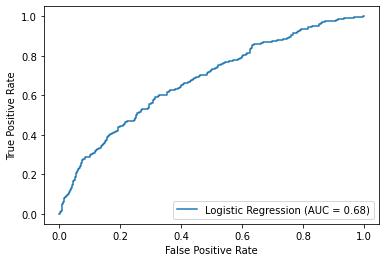

In [39]:
display = metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

# Iris Dataset

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
I = pd.read_csv('Iris.csv')
I

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
I['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [43]:
I.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [44]:
Xfea = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [45]:
X = I[Xfea]

In [46]:
Y = I['Species']

In [47]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3, random_state=42)

In [48]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

In [49]:
logreg = LogisticRegression(random_state=42, multi_class='ovr')
model = logreg.fit(Xtrain,Ytrain)

In [50]:
predy = model.predict(Xtest)

In [51]:
# model.predict_proba(Xtest)

### Performance Matrix

In [52]:
print(confusion_matrix(Ytest,predy))

[[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


In [53]:
print(classification_report(Ytest,predy))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      0.69      0.82        13
 Iris-virginica       0.76      1.00      0.87        13

       accuracy                           0.91        45
      macro avg       0.92      0.90      0.89        45
   weighted avg       0.93      0.91      0.91        45



In [54]:
metrics.accuracy_score(Ytest, predy)


0.9111111111111111

In [55]:
# auc = metrics.roc_auc_score(Ytest,model.predict_proba(Xtest)[:,:])
# auc

# not working due to more columns or some technical error